## W ~ Y correlation 조사


In [1]:
import numpy as np
import pandas as pd

import missingno
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import gaussian_kde
from scipy.stats import skew,kurtosis
%matplotlib inline
import os
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'
data2017 = pd.read_csv('NHIS_OPEN_GJ_2017_100.csv',encoding='euc-kr')
data2018 = pd.read_csv('NHIS_OPEN_GJ_2018_100.csv')


In [2]:
data2018['음주여부'] = data2018['음주여부'].fillna(0) #2018 음주여부 nan 값 0으로 채움
data = pd.concat([data2017, data2018]) # 2017, 2018 데이터 합침 
data.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [3]:
data = data.drop(['기준년도','가입자일련번호','총콜레스테롤','트리글리세라이드','HDL콜레스테롤', 'LDL콜레스테롤','구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자','시도코드', '혈색소', '청력(좌)', '청력(우)','시력(좌)','시력(우)',],1)
data.columns # 컬럼 제거

Index(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT',
       '감마지티피', '흡연상태', '음주여부'],
      dtype='object')

In [4]:
add_col = data['식전혈당(공복혈당)'].copy()

add_col[data['식전혈당(공복혈당)'] < 126] = 0
add_col[data['식전혈당(공복혈당)'] >= 126] = 1

data['당뇨여부'] = add_col

data = data.reset_index(drop=True, inplace=False)
data
# missingno.matrix(data,color=(0.1, 0.6, 0.8))


,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,당뇨여부
0,1,8,170,75,90.0,120.0,80.0,99.0,1.0,1.0,21.0,35.0,40.0,1.0,1.0,0.0
1,1,7,180,80,89.0,130.0,82.0,106.0,1.0,0.9,20.0,36.0,27.0,3.0,0.0,0.0
2,1,9,165,75,91.0,120.0,70.0,98.0,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0.0
3,1,11,175,80,91.0,145.0,87.0,95.0,1.0,1.1,29.0,34.0,18.0,1.0,0.0,0.0
4,1,11,165,60,80.0,138.0,82.0,101.0,1.0,0.8,19.0,12.0,25.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2,11,165,75,84.0,110.0,70.0,107.0,1.0,0.7,18.0,15.0,19.0,1.0,0.0,0.0
1999996,1,7,170,75,88.0,136.0,88.0,114.0,1.0,1.0,25.0,36.0,90.0,1.0,1.0,0.0
1999997,1,8,175,80,87.0,162.0,90.0,98.0,1.0,0.9,21.0,15.0,36.0,2.0,1.0,0.0
1999998,1,11,165,70,80.2,140.0,98.0,94.0,1.0,1.2,20.0,18.0,14.0,2.0,0.0,0.0


In [5]:
a = data.sort_values(by ='당뇨여부', ascending=False) # 내림차순 정렬, 당뇨여부 1로 잘 들어가잇음
a 

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,당뇨여부
1519022,1,11,160,70,89.0,133.0,78.0,168.0,1.0,0.8,24.0,25.0,63.0,3.0,1.0,1.0
433752,2,7,160,75,80.1,130.0,80.0,137.0,1.0,0.7,36.0,42.0,35.0,1.0,1.0,1.0
1597885,2,11,155,60,82.5,111.0,82.0,126.0,1.0,0.7,19.0,18.0,19.0,1.0,1.0,1.0
433674,1,9,175,70,81.0,120.0,80.0,139.0,1.0,0.8,24.0,29.0,64.0,3.0,1.0,1.0
433678,2,16,150,55,79.0,139.0,82.0,132.0,1.0,0.6,25.0,18.0,19.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999074,2,15,140,50,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN
1999381,2,14,155,50,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
1999427,2,14,155,55,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN
1999439,2,14,165,75,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN


<AxesSubplot:>

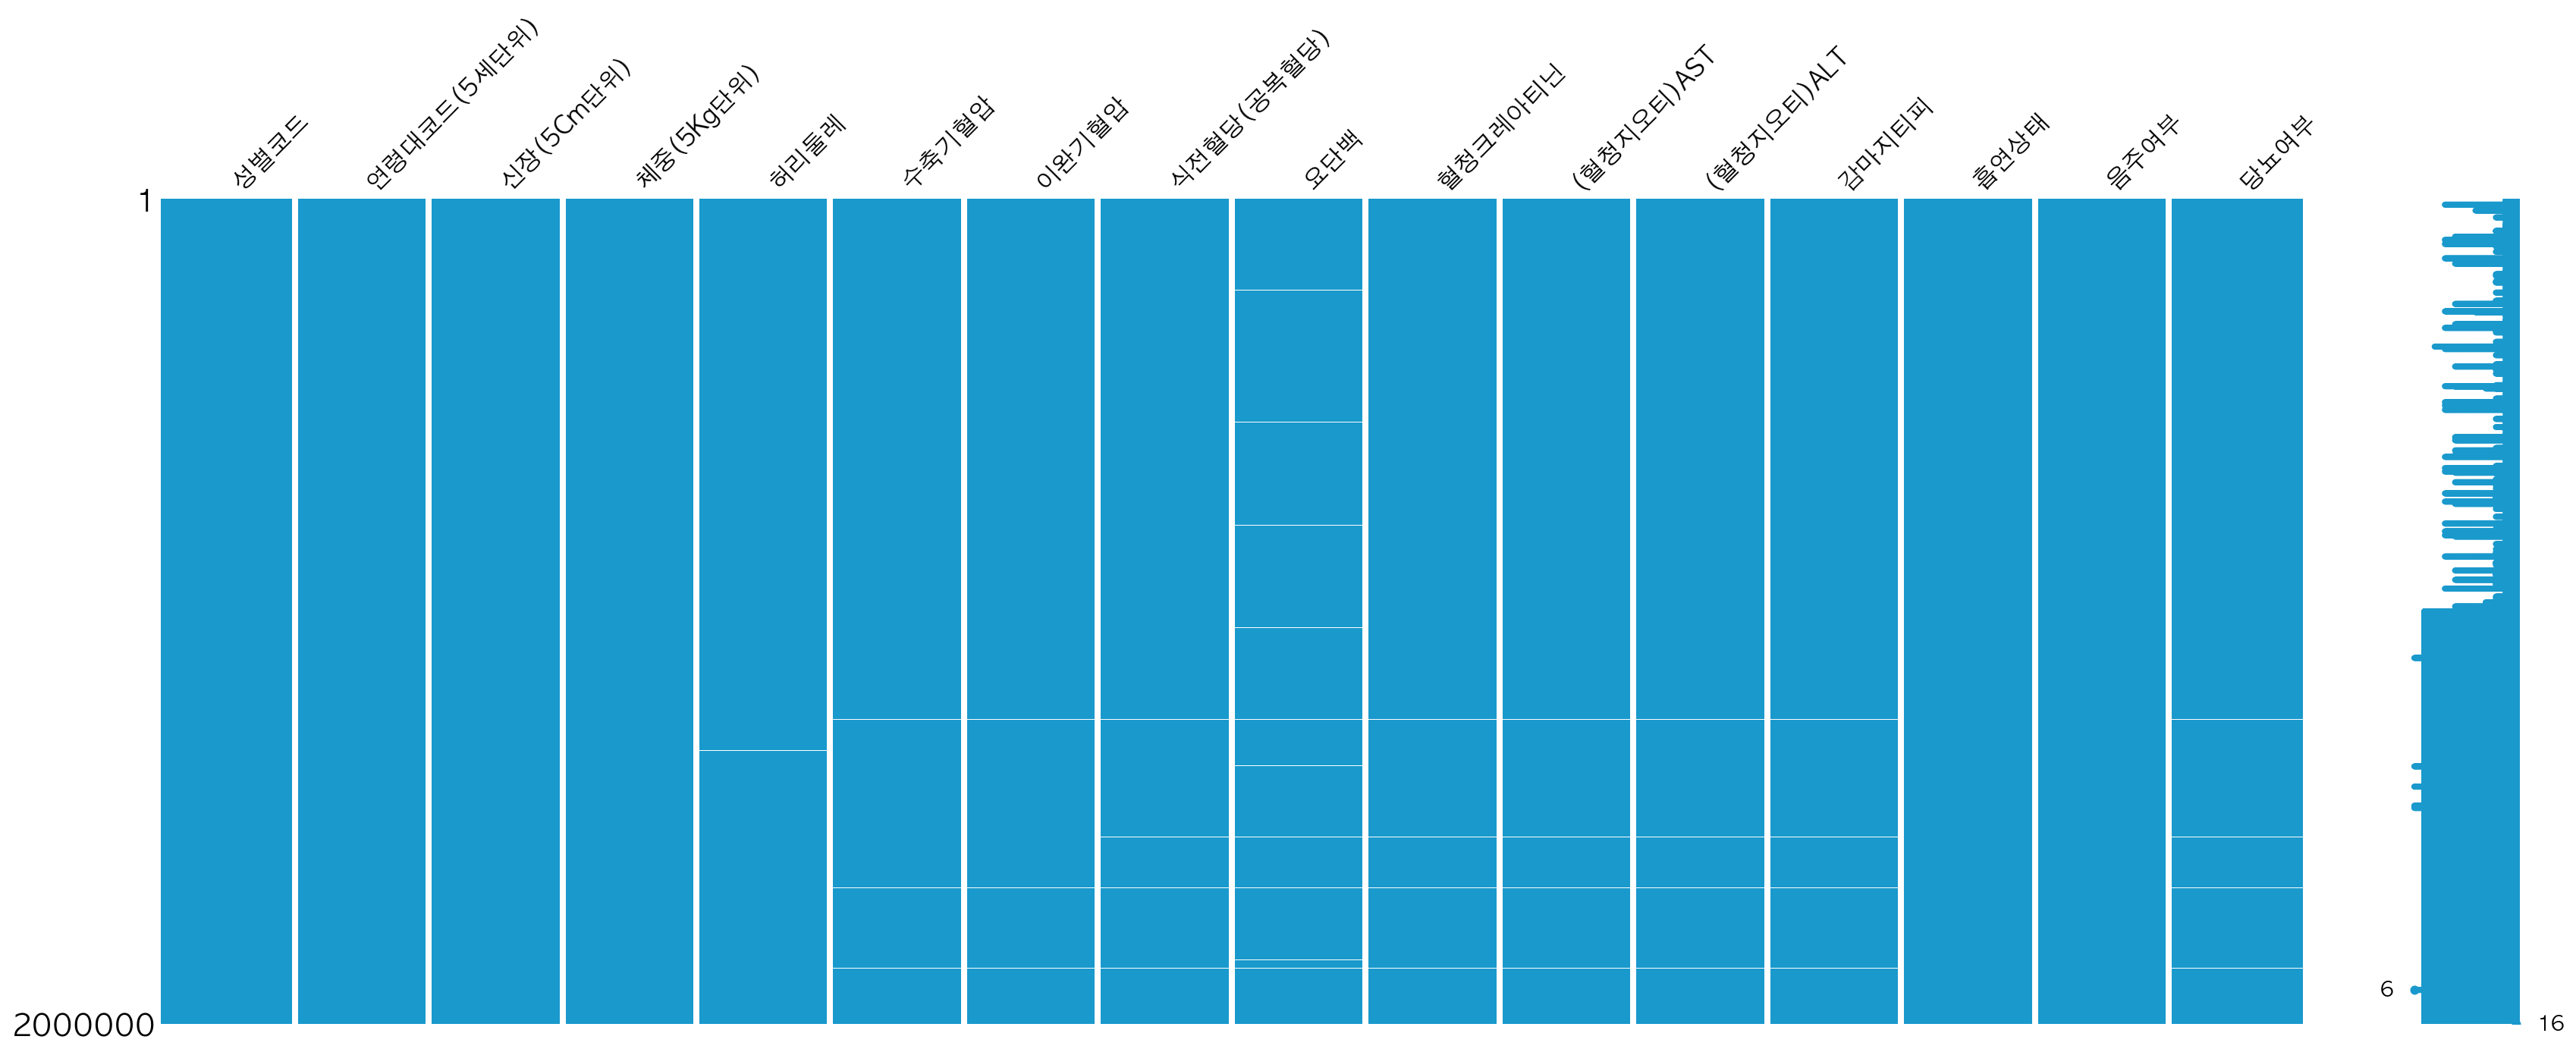

In [6]:
missingno.matrix(data,color=(0.1, 0.6, 0.8))

1983226

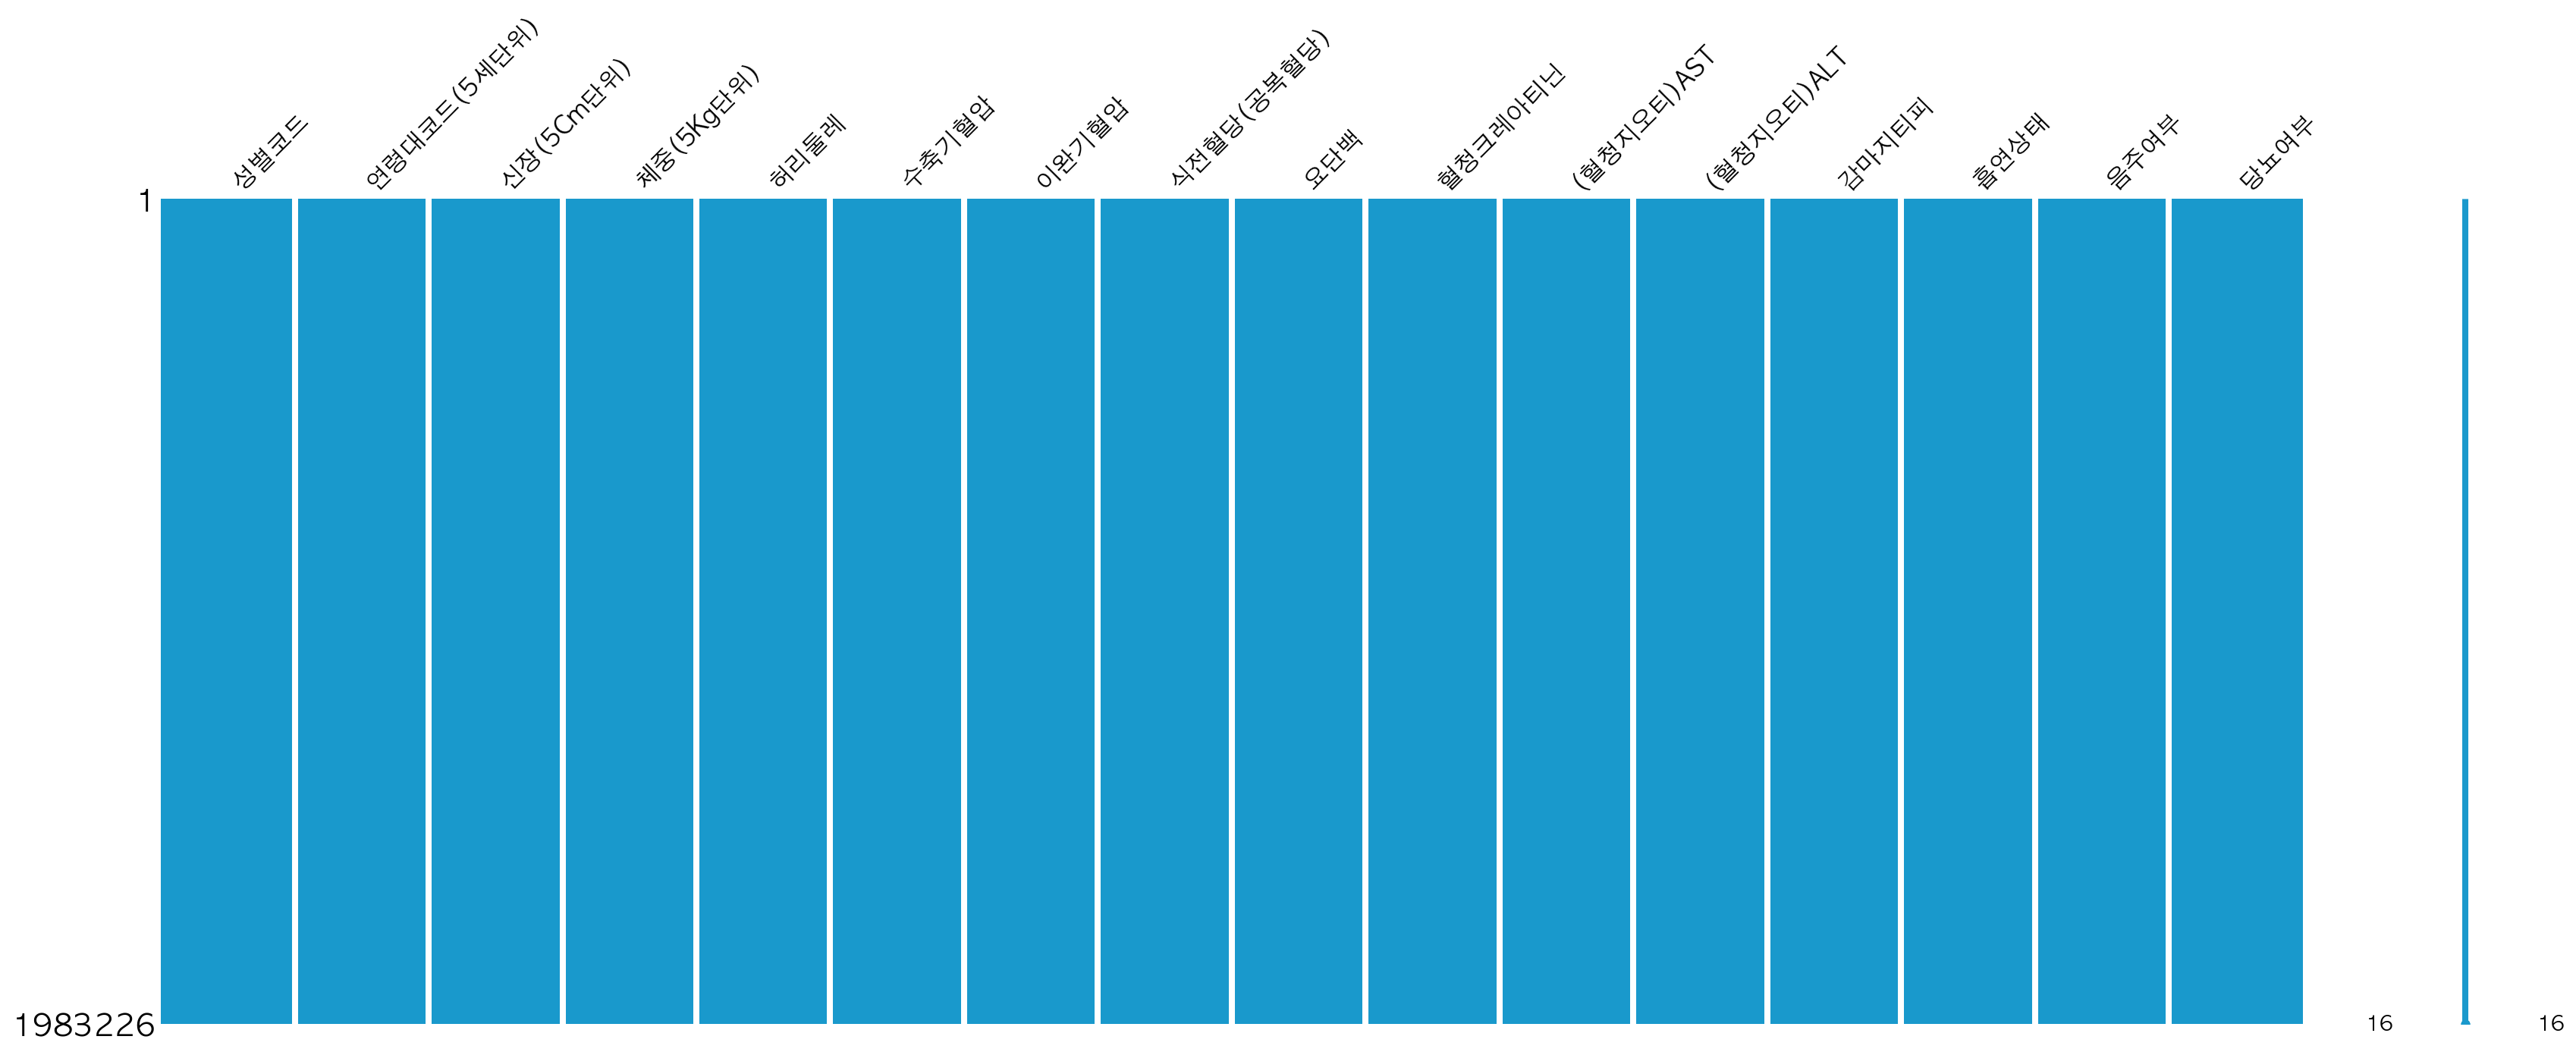

In [7]:
data = data.dropna(axis=0)
missingno.matrix(data,color=(0.1, 0.6, 0.8))
len(data)

## Z-SCORE로 이상치 제거

In [8]:
def z_score_method(df, variable_name):
    columns = df.columns
    z = np.abs(stats.zscore(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    print("index :",index)
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

### 1. 공복혈당

In [9]:
bs = z_score_method(data, '식전혈당(공복혈당)')
len(bs)
# bs

index : 7


36459

In [10]:
bs_outlier = data.drop(data.index[bs])
data = bs_outlier.copy()
data = data.reset_index(drop=True, inplace=False)
len(data)

1946767

In [11]:
print(len(bs_outlier['식전혈당(공복혈당)']),len(data['식전혈당(공복혈당)']))

#1983226 - 36459 = 1946767

1946767 1946767


In [12]:
data['식전혈당(공복혈당)'].describe()

count    1.946767e+06
mean     9.833382e+01
std      1.573292e+01
min      2.900000e+01
25%      8.900000e+01
50%      9.600000e+01
75%      1.040000e+02
max      1.730000e+02
Name: 식전혈당(공복혈당), dtype: float64

### 2. (혈청지오티)AST

In [13]:
ast = z_score_method(data, '(혈청지오티)AST')
len(ast)
# ast

index : 10


11023

In [14]:
ast_outlier = data.drop(data.index[ast])
ast_outlier = ast_outlier.reset_index(drop=True, inplace=False)
ast_outlier

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,당뇨여부
0,1,8,170,75,90.0,120.0,80.0,99.0,1.0,1.0,21.0,35.0,40.0,1.0,1.0,0.0
1,1,7,180,80,89.0,130.0,82.0,106.0,1.0,0.9,20.0,36.0,27.0,3.0,0.0,0.0
2,1,9,165,75,91.0,120.0,70.0,98.0,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0.0
3,1,11,175,80,91.0,145.0,87.0,95.0,1.0,1.1,29.0,34.0,18.0,1.0,0.0,0.0
4,1,11,165,60,80.0,138.0,82.0,101.0,1.0,0.8,19.0,12.0,25.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935739,2,11,165,75,84.0,110.0,70.0,107.0,1.0,0.7,18.0,15.0,19.0,1.0,0.0,0.0
1935740,1,7,170,75,88.0,136.0,88.0,114.0,1.0,1.0,25.0,36.0,90.0,1.0,1.0,0.0
1935741,1,8,175,80,87.0,162.0,90.0,98.0,1.0,0.9,21.0,15.0,36.0,2.0,1.0,0.0
1935742,1,11,165,70,80.2,140.0,98.0,94.0,1.0,1.2,20.0,18.0,14.0,2.0,0.0,0.0


In [15]:
print(len(ast_outlier['(혈청지오티)AST']),len(data['(혈청지오티)AST']))

#1946767 - 1935744 = 11023

1935744 1946767


In [ ]:
a = data['(혈청지오티)AST']
b = ast_outlier['(혈청지오티)AST']

plt.figure(figsize=(12, 10))
plt.hist(a, bins=10, label=['AST 이상치 처리 전'])
plt.show()

In [ ]:
plt.figure(figsize=(12, 10))
plt.hist(b, bins=10, label=['AST 이상치 처리 후'])
plt.show()

### 3. (혈청지오티)ALT

In [ ]:
alt = z_score_method(data, '(혈청지오티)ALT')
len(alt)
# alt

In [ ]:
alt_outlier = data.drop(data.index[alt])
alt_outlier = alt_outlier.reset_index(drop=True, inplace=False)
alt_outlier

In [ ]:
print(len(alt_outlier['(혈청지오티)ALT']),len(data['(혈청지오티)ALT']))

#1946767 - 1926946 = 19821

In [ ]:
a = data['(혈청지오티)ALT']
b = alt_outlier['(혈청지오티)ALT']

plt.figure(figsize=(12, 10))
plt.hist(a, bins=10, label=['ALT 이상치 처리 전'])
plt.show()

In [ ]:
plt.figure(figsize=(12, 10))
plt.hist(b, bins=10, label=['ALT 이상치 처리 후'])
plt.show()

### 4. 감마지티피

In [ ]:
gtp = z_score_method(data, '감마지티피')
len(gtp)
# gtp

In [ ]:
gtp_outlier = data.drop(data.index[gtp])
gtp_outlier = gtp_outlier.reset_index(drop=True, inplace=False)
gtp_outlier

In [ ]:
print(len(gtp_outlier['감마지티피']),len(data['감마지티피']))

#1946767 - 1916297 = 30470

In [ ]:
a = data['감마지티피']
b = gtp_outlier['감마지티피']

plt.figure(figsize=(12, 10))
plt.hist(a, bins=10, label=['GTP 이상치 처리 전'])
plt.show()

In [ ]:
plt.figure(figsize=(12, 10))
plt.hist(b, bins=10, label=['GTP 이상치 처리 후'])
plt.show()

## 피어슨 상관계수

In [ ]:
ast1 = ast_outlier[['식전혈당(공복혈당)','(혈청지오티)AST']].copy()
alt1 = alt_outlier[['식전혈당(공복혈당)','(혈청지오티)ALT']].copy()
gtp1 = gtp_outlier[['식전혈당(공복혈당)','감마지티피']].copy()

ast_corr = ast1.corr(method='pearson')
alt_corr = alt1.corr(method='pearson')
gtp_corr = gtp1.corr(method='pearson')

#### (혈청지오티)AST & 공복혈당 피어슨 상관계수

In [ ]:
ast_corr 

#### (혈청지오티)ALT & 공복혈당 피어슨 상관계수

In [ ]:
alt_corr 

#### 감마지티피 & 공복혈당 피어슨 상관계수

In [ ]:
gtp_corr 